In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ucimlrepo

In [4]:
digits = ucimlrepo.fetch_ucirepo(id=80)

X = digits.data.features
y = digits.data.targets

print(digits.variables)

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [107]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [108]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9902135231316725

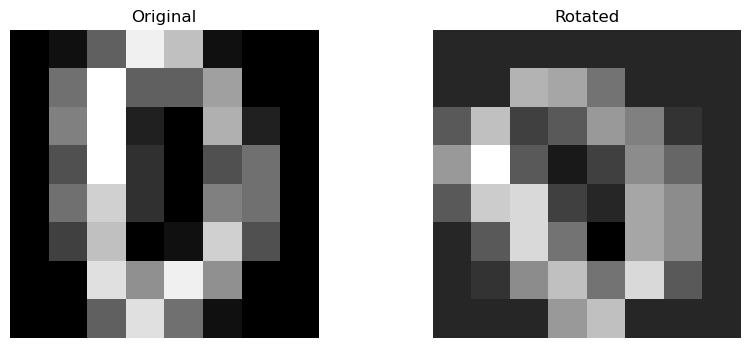

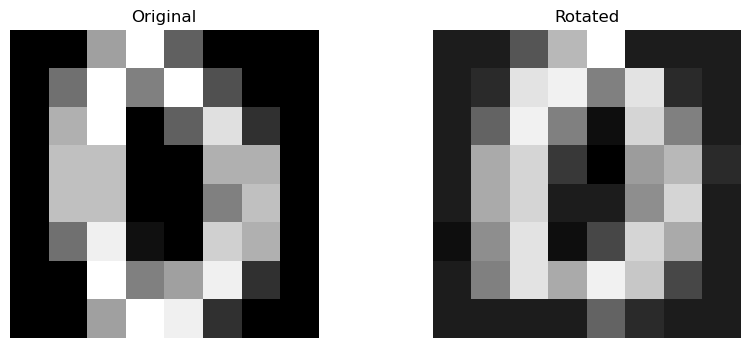

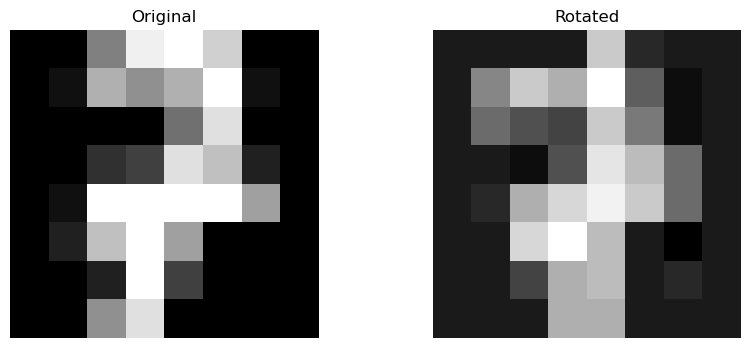

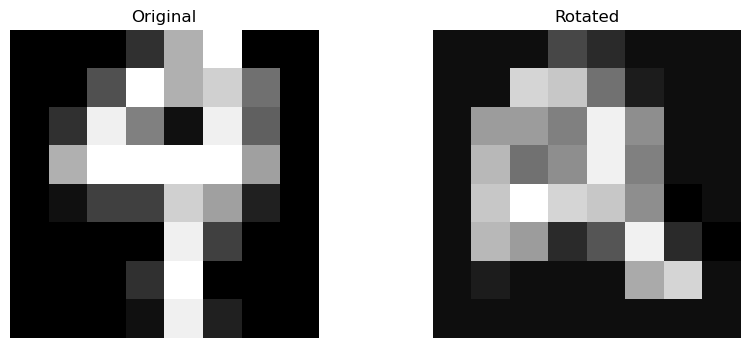

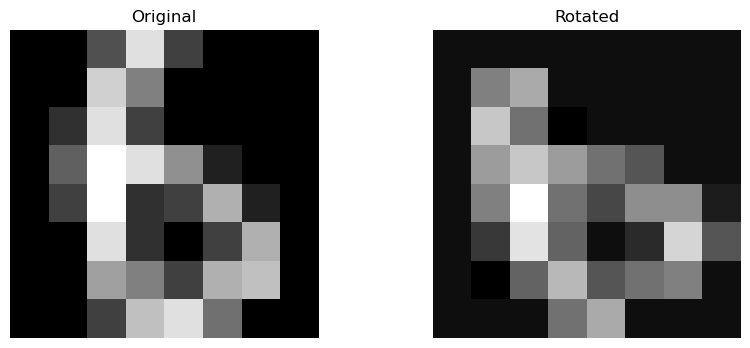

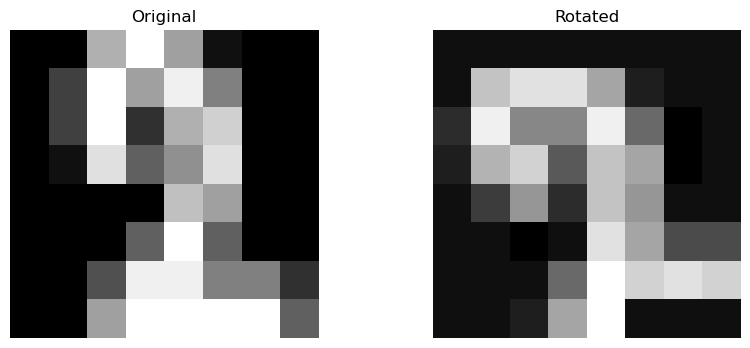

In [109]:
import numpy as np
from scipy.ndimage import affine_transform

def rotate_image(data, angle):

    # Convert angle from degrees to radians
    theta = np.radians(angle)

    # Rotation matrix (for counterclockwise rotation)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Compute the offset to keep the image centered
    center = np.array(data.shape) / 2
    offset = center - center @ rotation_matrix

    # Use affine_transform to rotate the image
    rotated_data = affine_transform(
        data,
        rotation_matrix.T,  # Transpose for affine_transform
        offset=offset,
        mode='constant',  # Fill empty space with zeros
        cval=0.0          # Value for areas outside the image
    )

    return rotated_data


for index, row in X.iterrows():
    image = row.values.reshape(8, 8)

    random_angle = np.random.uniform(-45, 45)

    rotated_image = rotate_image(image, angle=random_angle)

    # Visualize the first few images (optional)
    if index < 6:  # Visualize only the first 6 images
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Rotated")
        plt.imshow(rotated_image, cmap='gray')
        plt.axis('off')

        plt.show()

In [110]:
def create_rotated_dataset(
    X: pd.DataFrame or np.ndarray, 
    y: pd.DataFrame or np.ndarray, 
    angle=5, 
    numpy_output=True):

    augmented_images = []
    augmented_labels = []

    def iterator(X):
        for index in range(X.shape[0]):
            yield index, X[index]

    if isinstance(X, pd.DataFrame):
        X = np.array(X)
    elif isinstance(X, np.ndarray):
        pass
    else:
        raise TypeError("Only give numpy arrays or pandas dataframes as input")


    # we create a duplicate dataset, rotating each image
    for index, image in iterator(X):
        image = image.reshape(8, 8)

        random_angle = np.random.uniform(-angle, angle)

        # take the absolute value of the transformed image
        rotated_image = np.abs(rotate_image(image, angle=random_angle)).flatten()
        augmented_images.append(rotated_image)

        # handle the labeles
        if isinstance(y, pd.DataFrame):
            augmented_labels.append(y['class'].iloc[index])
        elif isinstance(y, np.ndarray):
            augmented_labels.append(y[index])
        else:
            raise ValueError("y must be numpy array or pandas dataframe")


    X_aug = np.array(augmented_images)
    y_aug = np.array(augmented_labels).reshape(-1, 1)

    if not numpy_output:
        # return as pandas dataframe (just in case)
        Xaugmented = pd.DataFrame(X_aug, columns=[f"attribute_{i}" for i in range(X_aug.shape[1])])
        Yaugmented = pd.DataFrame(y_aug, columns=['label'])
        return Xaugmented, Yaugmented
    
    return X_aug, y_aug

In [111]:
X_aug_test, y_aug_test = create_rotated_dataset(X_test, y_test, angle=5)

In [112]:
y_pred_aug = svm_model.predict(X_aug_test)

print("Accuracy:", accuracy_score(y_aug_test, y_pred_aug))
print("Classification Report:\n", classification_report(y_aug_test, y_pred_aug))

Accuracy: 0.9661921708185054
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.94      0.99      0.97       102
           2       1.00      0.98      0.99       107
           3       1.00      0.94      0.97       118
           4       0.94      0.99      0.96       117
           5       0.95      0.87      0.91        97
           6       0.98      0.98      0.98       123
           7       0.98      1.00      0.99       124
           8       0.92      0.99      0.95       105
           9       0.94      0.92      0.93       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[ 0 10 20 30 40 50 60 70 80 90]


/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted w

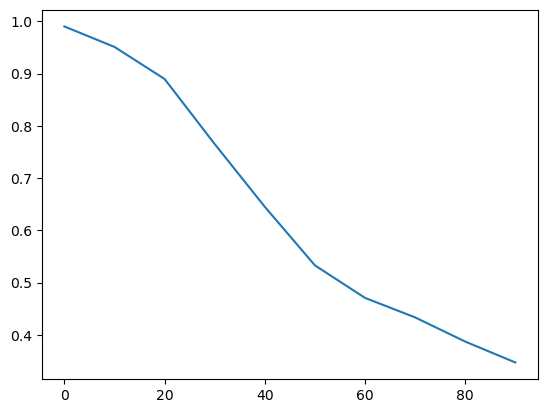

In [113]:
angles = np.arange(0, 100, 10)
print(angles)

accuracies = []
for angle in angles:
    X_aug_test, y_aug_test = create_rotated_dataset(X_test, y_test, angle=angle)
    y_pred_aug = svm_model.predict(X_aug_test)
    accuracies.append(accuracy_score(y_aug_test, y_pred_aug))


plt.plot(angles, accuracies)
plt.show()
